## Linear Regression
0.8442111526496523

In [1]:
import model
data = model.data

In [3]:
data.drop("standard_deviation_travel_time", axis = 1, inplace=True)
data.drop("geometric_mean_travel_time", axis = 1, inplace=True)
data.drop("geometric_standard_deviation_travel_time", axis = 1, inplace=True)
data.drop("busyness", axis = 1, inplace=True)
data.head()

sourceid  dstid  mean_travel_time  year  quarter  weekend  daytime  \
0        42     30            850.67  2016        1        0  PM Peak   
1       143    141            207.45  2016        1        0  AM Peak   
2        22     25            409.74  2016        1        0   Midday   
3        28     43            249.28  2016        1        0  Evening   
4        26     63            799.16  2016        1        0  Evening   

   pair_day_mean  daytime_AM Peak  daytime_Early Morning  daytime_Evening  \
0     919.659000                0                      0                0   
1     245.911000                1                      0                0   
2     524.030500                0                      0                0   
3     262.669125                0                      0                1   
4     869.259500                0                      0                1   

   daytime_Midday  daytime_PM Peak  
0               0                1  
1               0                0  
2               1                0  
3               0                0  
4               0                0

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [5]:
input = data.drop("mean_travel_time", axis=1)
output = data[["mean_travel_time"]]

# We now have the train en test input with categories. This helps with visualisation later.
xTrainC, xTestC, yTrain, yTest = train_test_split(input, output, test_size = 0.2, random_state = 0)

xTrain = xTrainC.drop("daytime", axis=1)
xTest = xTestC.drop("daytime", axis=1)

In [6]:
linearRegression = LinearRegression()
linearRegression.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# R2 scores for train and test set are approximately the same.
print(linearRegression.score(xTrain,yTrain))
print(linearRegression.score(xTest,yTest))

# predict for the Test set
prediction_LR = linearRegression.predict(xTest)

0.894721581134606
0.8945254032400769


## Polynomial regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(xTrain)

In [9]:
model = LinearRegression()
model.fit(X_poly, yTrain)
y_poly_pred = model.predict(X_poly)

In [10]:
X_poly_test = poly.fit_transform(xTest)
prediction_PR = model.predict(X_poly_test)

In [11]:
# r2 score of the train and test set are about the same, so the model is not under or overfitting!
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(yTrain,y_poly_pred))
print(r2_score(yTest,prediction_PR))

0.909373956908148
0.909266993309447


## Decision Tree

In [12]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(xTrain, yTrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [13]:
# R2 scores of train and test set
print(r2_score(yTest,regressor.predict(xTest)))
print(r2_score(yTrain,regressor.predict(xTrain)))

prediction_tree = regressor.predict(xTest)


0.9025335487492885
0.9592667376934014


## Randomized search for best parameters

In [110]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


tree = DecisionTreeRegressor()
parameters = {  'max_depth': [3, None],
                'max_features': randint(1, 9),
                'min_samples_split'    : randint(1, 9),
                'min_samples_leaf' : randint(1, 9),
                "criterion": ["mse", "friedman_mse", "mae"]
                }

randm = RandomizedSearchCV(estimator=tree, param_distributions = parameters,
                            cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(xTrain, yTrain)

# Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
        randm.best_estimator_)
print("\n The best score across ALL searched params:\n",
        randm.best_score_)
print("\n The best parameters across ALL searched params:\n",
        randm.best_params_)
print("\n ========================================================")

In [107]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal no

## Visualising the different models

In [15]:
# put data, busyness and predictions all together
testComplete = xTestC
testComplete["mean_travel_time"] = yTest
testComplete["predictionLR"] = prediction_LR # Linear regression
testComplete["predictionPR"] = prediction_PR # Polynominal regression
testComplete["predictionTree"] = prediction_tree # Prediction tree

# for visualisation we are going to look at one area-pair
testCentrum = testComplete[testComplete["sourceid"] == 24]
testCentrum = testCentrum[testCentrum["dstid"] == 8]

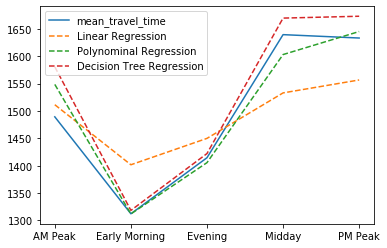

In [16]:
# visualise the accuracy of the model
plt.plot(testCentrum.groupby(["daytime"]).mean()["mean_travel_time"], label="mean_travel_time")
plt.plot(testCentrum.groupby(["daytime"]).mean()["predictionLR"], label="Linear Regression", linestyle = '--')
plt.plot(testCentrum.groupby(["daytime"]).mean()["predictionPR"], label="Polynominal Regression", linestyle = '--')
plt.plot(testCentrum.groupby(["daytime"]).mean()["predictionTree"], label="Decision Tree Regression", linestyle = '--')
plt.legend()